In [266]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import make_pipeline
import statistics

In [267]:
wine_sales = pd.read_csv("wine_sales_data.csv")


In [268]:
wine_price = pd.DataFrame(wine_sales)

In [269]:
wine_price.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [270]:
wine_price.tail(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
150920,150920,Italy,"Rich and mature aromas of smoke, earth and her...",Brut Riserva,91,19.0,Northeastern Italy,Trento,NaN,Champagne Blend,Letrari
150921,150921,France,Shows some older notes: a bouquet of toasted w...,Blanc de Blancs Brut Mosaïque,91,38.0,Champagne,Champagne,NaN,Champagne Blend,Jacquart
150922,150922,Italy,Made by 30-ish Roberta Borghese high above Man...,Superiore,91,NaN,Northeastern Italy,Colli Orientali del Friuli,NaN,Tocai,Ronchi di Manzano
150923,150923,France,"Rich and toasty, with tiny bubbles. The bouque...",Demi-Sec,91,30.0,Champagne,Champagne,NaN,Champagne Blend,Jacquart
150924,150924,France,"Really fine for a low-acid vintage, there's an...",Diamant Bleu,91,70.0,Champagne,Champagne,NaN,Champagne Blend,Heidsieck & Co Monopole
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset
150929,150929,Italy,More Pinot Grigios should taste like this. A r...,NaN,90,15.0,Northeastern Italy,Alto Adige,NaN,Pinot Grigio,Alois Lageder


In [271]:
wine_price.shape

(150930, 11)

In [272]:
wine_price.info

<bound method DataFrame.info of         Unnamed: 0 country                                        description  \
0                0      US  This tremendous 100% varietal wine hails from ...   
1                1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2                2      US  Mac Watson honors the memory of a wine once ma...   
3                3      US  This spent 20 months in 30% new French oak, an...   
4                4  France  This is the top wine from La Bégude, named aft...   
...            ...     ...                                                ...   
150925      150925   Italy  Many people feel Fiano represents southern Ita...   
150926      150926  France  Offers an intriguing nose with ginger, lime an...   
150927      150927   Italy  This classic example comes from a cru vineyard...   
150928      150928  France  A perfect salmon shade, with scents of peaches...   
150929      150929   Italy  More Pinot Grigios should taste like this. A r...

In [273]:
x = wine_price.copy(deep=True)

In [274]:
wine_price.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [275]:
wine_price.dropna()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
...,...,...,...,...,...,...,...,...,...,...,...
150889,150889,US,A bizarre style of wine. The aromas are Port-l...,Lafond Vineyard,82,35.0,California,Santa Ynez Valley,Central Coast,Pinot Noir,Lafond
150892,150892,US,"A light, earthy wine, with violet, berry and t...",Coastal,82,10.0,California,California,California Other,Merlot,Callaway
150914,150914,US,"Old-gold in color, and thick and syrupy. The a...",Late Harvest Cluster Select,94,25.0,California,Anderson Valley,Mendocino/Lake Counties,White Riesling,Navarro
150915,150915,US,"Decades ago, Beringer’s then-winemaker Myron N...",Nightingale,93,30.0,California,North Coast,North Coast,White Blend,Beringer


In [276]:
wine_price['country'] == 'Portugal'
wine_price['province'] == 'Vinho Verde'

0         False
1         False
2         False
3         False
4         False
          ...  
150925    False
150926    False
150927    False
150928    False
150929    False
Name: province, Length: 150930, dtype: bool

In [277]:
wine_price=wine_price[wine_price['country'] == 'Portugal']
wine_price=wine_price[wine_price['province'] == 'Vinho Verde']


In [278]:
Q1 = wine_price["price"].quantile(0.25)
Q3 = wine_price["price"].quantile(0.75)
IQR = Q3 - Q1
wine_sales = wine_sales.query('(@Q1 - 1.5 * @IQR) <= price <= (@Q3 + 1.5 * @IQR)')

print(Q1)
print(Q3)
print(IQR)


8.0
13.0
5.0


In [279]:
wine_price['price_label'] = wine_price['price'].apply(lambda value: 'low'
if value <= 16 else 'medium'
if value <= 40 else 'high') 

In [280]:
wine_price['price_label'] = pd.Categorical(wine_price['price_label'],
categories=['low', 'medium', 'high'])



In [281]:
display(wine_price[wine_price['price_label']=='low'])

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,price_label
993,993,Portugal,"With its typical prickle on the tongue, this i...",Campelo,85,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo,low
994,994,Portugal,"Lightly spritzy, this tastes of crisp apple an...",Miranda,85,9.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo,low
1558,1558,Portugal,This medium-sweet rosé is a familiar style of ...,Campelo,84,10.0,Vinho Verde,NaN,NaN,Rosé,Caves Campelo,low
1559,1559,Portugal,"Soft, light and fruity, this wine is ready for...",Casal da Seara,84,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo,low
1694,1694,Portugal,"Crisp, dry and fresh, this is a lively and fru...",Torre de Vila Nova,88,12.0,Vinho Verde,NaN,NaN,Portuguese White,Casa de Vila Nova,low
...,...,...,...,...,...,...,...,...,...,...,...,...
141129,141129,Portugal,"A simple, rather earthy, dry style of vinho ve...",NaN,83,9.0,Vinho Verde,NaN,NaN,Portuguese White,Adega Cooperativa Ponte de Lima,low
141143,141143,Portugal,The estate wine from Vila Verde which is in Lo...,NaN,82,8.0,Vinho Verde,NaN,NaN,Portuguese White,Casa de Vila Verde,low
141148,141148,Portugal,"The standard style of inexpensive Vinho Verde,...",Gatão,82,6.0,Vinho Verde,NaN,NaN,Portuguese White,Borges,low
143472,143472,Portugal,"Very nice Vinho Verde, with fresh, green apple...",NaN,86,9.0,Vinho Verde,NaN,NaN,White Blend,Casa de Vila Verde,low


In [282]:
wine_price['price_label'] = wine_price['price'].apply(lambda value: 'low'
if value <= 16 else 'medium'
if value <= 40 else 'high')                            

In [283]:
statistics.median(wine_price['price'])


nan

In [284]:
statistics.mean(wine_price['price'])

nan

Text(0.5, 1.0, 'Price Range Vinho Verde')

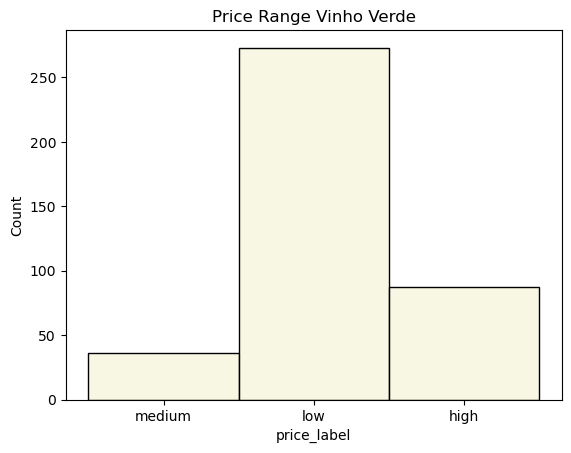

In [285]:
sns.histplot(data=wine_price, x= 'price_label', bins=10, color= 'beige').set_title('Price Range Vinho Verde')